# 01. Electricity Load Diagrams – Data Loading & Initial Exploration

## Objective
This notebook performs the following tasks:
- Load the Electricity Load Diagrams dataset from a local CSV file (downloaded and normalized from UCI).
- Transform the raw data into a time-series format.
- Conduct a preliminary check of the data structure and quality (missing values, zeros).
- Perform light exploratory visualization to understand electricity consumption patterns.

## 1. Setup and Imports
Install the core libraries in requirements.txt.

In [1]:
# Core
import numpy as np
import pandas as pd
import sys
import os

# Visualization
import matplotlib.pyplot as plt

# Add the root directory to the path so Python can find the 'src' module
sys.path.append(os.path.abspath('../'))
from src.data_loader import load_raw_data

# Display configuration
pd.set_option("display.max_columns", 50)
pd.set_option("display.width", 120)

# Check Python version (Requires 3.10.11 as specified in .python-version)
print(f"Python version: {sys.version}")

Python version: 3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)]


## 2. Load Dataset – via src/data_loader.py
Instead of using load_dataset from Hugging Face (which encounters script errors), we load the CSV file that was generated by scripts/download_data.py, which is already integrated into data_loader.py.

In [2]:
# Call the function from src/data_loader.py
try:
    df = load_raw_data()
    print("✅ Data loaded successfully!")
    print(f"📊 Shape: {df.shape[0]} rows, {df.shape[1]} customers.")
except Exception as e:
    print(f"❌ Error: {e}")

✅ Data loaded successfully!
📊 Shape: 140256 rows, 370 customers.


## 3. Data Inspection
We examine the last few rows to identify the columns corresponding to the 370 customers (from MT_001 to MT_370).

In [3]:
# View the last 5 rows
print(f"Index data type: {df.index.dtype}")
print(f"Current first column: {df.columns[0]}")
df.tail()

Index data type: datetime64[ns]
Current first column: MT_001


,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,MT_011,MT_012,MT_013,MT_014,MT_015,MT_016,MT_017,MT_018,MT_019,MT_020,MT_021,MT_022,MT_023,MT_024,MT_025,...,MT_346,MT_347,MT_348,MT_349,MT_350,MT_351,MT_352,MT_353,MT_354,MT_355,MT_356,MT_357,MT_358,MT_359,MT_360,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00,2.538071,22.048364,1.737619,150.406504,85.365854,303.571429,11.305822,282.828283,68.181818,72.043011,71.535022,168.085106,35.655058,50.414805,65.599174,84.851936,82.659479,357.827476,13.065327,63.436123,193.717277,31.133250,18.469657,49.382716,322.429907,...,220.081136,0.0,40.69176,115.191147,174.129353,635.555556,23.255814,170.622194,25.050100,273.972603,16.472868,833.333333,217.703349,29.914530,206.140351,276.945039,28200.0,1616.033755,1363.636364,29.986962,5.851375,697.102722,176.961603,651.026393,7621.621622
2014-12-31 23:15:00,2.538071,21.337127,1.737619,166.666667,81.707317,324.404762,11.305822,252.525253,64.685315,72.043011,67.064083,165.957447,34.825871,48.500319,62.500000,74.031891,80.862534,341.853035,12.562814,75.770925,191.099476,34.246575,19.129288,50.068587,317.757009,...,216.024341,0.0,0.00000,109.154930,174.129353,635.555556,23.255814,169.980757,26.052104,275.494673,16.472868,825.757576,218.500797,28.490028,192.982456,279.800143,28300.0,1569.620253,1340.909091,29.986962,9.947338,671.641791,168.614357,669.354839,6702.702703
2014-12-31 23:30:00,2.538071,20.625889,1.737619,162.601626,82.926829,318.452381,10.175240,242.424242,61.188811,74.193548,65.573770,170.212766,39.800995,47.862157,62.500000,76.879271,80.862534,341.853035,11.557789,64.317181,198.952880,36.114570,16.490765,49.382716,327.102804,...,217.038540,0.0,0.00000,110.160966,174.129353,635.555556,24.006002,171.905067,26.052104,273.972603,15.503876,689.393939,221.690590,28.490028,191.885965,284.796574,27800.0,1556.962025,1318.181818,27.379400,9.362200,670.763828,153.589316,670.087977,6864.864865
2014-12-31 23:45:00,1.269036,21.337127,1.737619,166.666667,85.365854,285.714286,10.175240,225.589226,64.685315,72.043011,61.847988,161.702128,40.630182,48.500319,61.983471,78.018223,80.862534,335.463259,10.552764,64.317181,206.806283,34.246575,13.852243,45.267490,285.046729,...,189.655172,0.0,40.69176,108.651911,174.129353,640.000000,23.255814,157.152021,26.052104,272.450533,16.472868,621.212121,214.513557,28.490028,190.789474,246.252677,28000.0,1443.037975,909.090909,26.075619,4.095963,664.618086,146.911519,646.627566,6540.540541
2015-01-01 00:00:00,2.538071,19.914651,1.737619,178.861789,84.146341,279.761905,10.175240,249.158249,62.937063,69.892473,67.809240,163.829787,36.484245,46.585833,61.466942,73.462415,75.471698,319.488818,11.055276,67.841410,185.863874,31.133250,13.192612,45.953361,285.046729,...,197.768763,0.0,0.00000,108.651911,149.253731,622.222222,23.255814,159.717768,24.048096,267.884323,16.472868,613.636364,217.703349,28.490028,175.438596,188.436831,27800.0,1409.282700,954.545455,27.379400,4.095963,628.621598,131.886477,673.020528,7135.135135


In [4]:
# Check data types and overall memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 140256 entries, 2011-01-01 00:15:00 to 2015-01-01 00:00:00
Columns: 370 entries, MT_001 to MT_370
dtypes: float64(370)
memory usage: 397.0 MB


## 4. Data Quality Check
Electricity load data often contains periods with zero values when customers have not yet had metering devices installed.

In [5]:
# 1. Check for missing values (NaN)
missing = df.isnull().sum().sum()
print(f"Total number of NaN values: {missing}")

# 2. Check for zero values (a characteristic of this dataset)
zeros_count = (df == 0).sum().sum()
total_cells = df.size
print(f"Total number of zero values: {zeros_count} ({zeros_count / total_cells:.2%})")

# 3. Basic descriptive statistics for a few columns
df.iloc[:, :5].describe()

Total number of NaN values: 0
Total number of zero values: 10457342 (20.15%)


,MT_001,MT_002,MT_003,MT_004,MT_005
count,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000
mean,3.970785,20.768480,2.918308,82.184490,37.240309
std,5.983965,13.272415,11.014456,58.248392,26.461327
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.844950,0.000000,36.585366,15.853659
50%,1.269036,24.893314,1.737619,87.398374,39.024390
75%,2.538071,29.871977,1.737619,115.853659,54.878049
max,48.223350,115.220484,151.172893,321.138211,150.000000


## 5. Visual Exploration
Plot the consumption pattern of a sample customer (e.g., MT_001) to observe daily cyclic behavior.

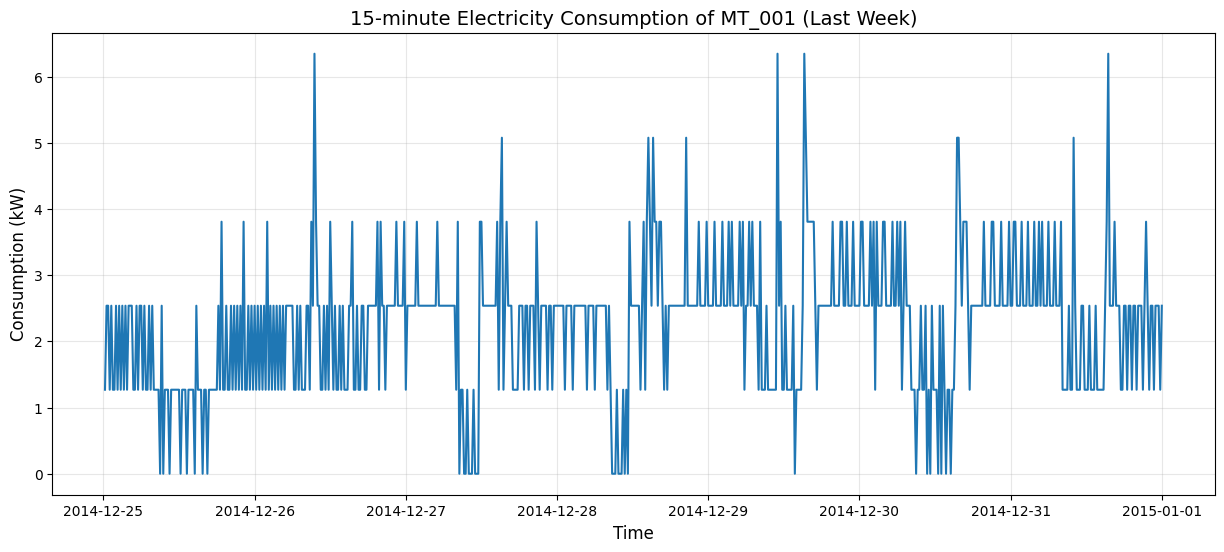

In [6]:
# Select customer MT_001 and plot the last 7 days of data (96 points/day * 7)
sample_client = 'MT_001'

plt.figure(figsize=(15, 6))
plt.plot(df[sample_client].tail(96 * 7), color='tab:blue', linewidth=1.5)
plt.title(f'15-minute Electricity Consumption of {sample_client} (Last Week)', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Consumption (kW)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

## 7. Preliminary Conclusion
- Data types: The index column is a Timestamp (sorted in ascending order). All other columns are of type float. MT_001 is the first customer column (column index = 0).
- Structure: The dataset contains 140,256 time points (15-minute frequency) for 370 consumer households.
- Data quality: There are no missing values (NaN). However, a significant proportion of values are zeros, reflecting that customers joined the system at different times.
- Characteristics: The plot reveals a very strong daily seasonality in electricity consumption.
- Next steps: Proceed to notebook 02_eda.ipynb for deeper analysis of seasonal components (daily, weekly, and yearly).